In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
import glob
'''
def merge_csv_files(folder_path, chunksize=100000000000):
    all_files = glob.glob(folder_path + '/*.csv')
    df = pd.DataFrame()

    for file in all_files:
        for chunk in pd.read_csv(file, chunksize=chunksize):
            df = pd.concat([df, chunk], ignore_index=True)

    return df

merged_df = merge_csv_files('/content/Data_movie', chunksize=100000000000)
merged_df.to_csv('merged_data.csv', index=False)'''

"\ndef merge_csv_files(folder_path, chunksize=100000000000):\n    all_files = glob.glob(folder_path + '/*.csv')\n    df = pd.DataFrame()\n\n    for file in all_files:\n        for chunk in pd.read_csv(file, chunksize=chunksize):\n            df = pd.concat([df, chunk], ignore_index=True)\n\n    return df\n\nmerged_df = merge_csv_files('/content/Data_movie', chunksize=100000000000)\nmerged_df.to_csv('merged_data.csv', index=False)"

In [ ]:
import dask.dataframe as dd

merged_df = dd.read_csv(glob.glob('/content/Data_movie/*.csv')[0])

# Gabungkan dengan file CSV lainnya secara berurutan
for file in glob.glob('/content/Data_movie/*.csv')[1:]:
    df = dd.read_csv(file)
    merged_df = dd.merge(merged_df, df, on='id', how='outer')

# Konversi ke Pandas DataFrame jika diperlukan
merged_df = merged_df.compute()

print(merged_df)

            id department_x   job_x             name_x  vote_average  \
0        19995      Editing  Editor  Stephen E. Rivkin           7.2   
1        19995      Editing  Editor  Stephen E. Rivkin           7.2   
2        19995      Editing  Editor  Stephen E. Rivkin           7.2   
3        19995      Editing  Editor  Stephen E. Rivkin           7.2   
4        19995      Editing  Editor  Stephen E. Rivkin           7.2   
...        ...          ...     ...                ...           ...   
834217  325123         <NA>    <NA>               <NA>           3.0   
834218  320435         <NA>    <NA>               <NA>           0.0   
834219   40963         <NA>    <NA>               <NA>          10.0   
834220  194588         <NA>    <NA>               <NA>           0.0   
834221   38786         <NA>    <NA>               <NA>           0.0   

        vote_count                                            title_x  \
0          11800.0                                            

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834222 entries, 0 to 834221
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            834222 non-null  int64  
 1   department_x  834194 non-null  string 
 2   job_x         834194 non-null  string 
 3   name_x        834194 non-null  string 
 4   vote_average  834222 non-null  float64
 5   vote_count    833872 non-null  float64
 6   title_x       834222 non-null  string 
 7   popularity    834222 non-null  float64
 8   release_date  834221 non-null  string 
 9   department_y  834194 non-null  string 
 10  job_y         834194 non-null  string 
 11  name_y        834194 non-null  string 
 12  title_y       834222 non-null  string 
 13  sequel        41464 non-null   float64
dtypes: float64(4), int64(1), string(9)
memory usage: 151.1 MB


In [ ]:
merged_df.columns

Index(['id', 'department_x', 'job_x', 'name_x', 'vote_average', 'vote_count',
       'title_x', 'popularity', 'release_date', 'department_y', 'job_y',
       'name_y', 'title_y', 'sequel'],
      dtype='object')

In [ ]:
actors = pd.read_csv('/content/actors_movies.csv')
genres = pd.read_csv('/content/movie_to_genres.csv')

In [ ]:
actors.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


In [ ]:
actors.rename(columns={'Title': 'title_x'}, inplace=True)

In [ ]:
actors.head()

,Actor,title_x
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


In [ ]:
genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [ ]:
genres.rename(columns={'movie_id': 'id'}, inplace=True)

In [ ]:
genres.head()

,id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [ ]:
merged_df.head()

,id,department_x,job_x,name_x,vote_average,vote_count,title_x,popularity,release_date,department_y,job_y,name_y,title_y,sequel
0,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Editing,Editor,Stephen E. Rivkin,Avatar,NaN
1,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Sound,Sound Designer,Christopher Boyes,Avatar,NaN
2,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Production,Casting,Mali Finn,Avatar,NaN
3,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Directing,Director,James Cameron,Avatar,NaN
4,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Writing,Writer,James Cameron,Avatar,NaN


In [ ]:
merged_df_genres = pd.merge(merged_df, genres, on='id', how='outer')

In [ ]:
merged_df_genres.head()

,id,department_x,job_x,name_x,vote_average,vote_count,title_x,popularity,release_date,department_y,job_y,name_y,title_y,sequel,genre
0,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Editing,Editor,Stephen E. Rivkin,Avatar,NaN,Action
1,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Editing,Editor,Stephen E. Rivkin,Avatar,NaN,Adventure
2,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Editing,Editor,Stephen E. Rivkin,Avatar,NaN,Fantasy
3,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Editing,Editor,Stephen E. Rivkin,Avatar,NaN,Science Fiction
4,19995,Editing,Editor,Stephen E. Rivkin,7.2,11800.0,Avatar,150.437577,2009-12-10,Sound,Sound Designer,Christopher Boyes,Avatar,NaN,Action


In [ ]:
movies_final = pd.merge(actors, merged_df_genres , on='title_x', how='outer')

In [ ]:
movies_final.head()

,Actor,title_x,id,department_x,job_x,name_x,vote_average,vote_count,popularity,release_date,department_y,job_y,name_y,title_y,sequel,genre
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix,603.0,Production,Casting,Mali Finn,7.9,8907.0,104.309993,1999-03-30,Production,Casting,Mali Finn,The Matrix,604.0,Action
1,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix,603.0,Production,Casting,Mali Finn,7.9,8907.0,104.309993,1999-03-30,Production,Casting,Mali Finn,The Matrix,604.0,Science Fiction
2,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix,603.0,Production,Casting,Mali Finn,7.9,8907.0,104.309993,1999-03-30,Directing,Director,Lilly Wachowski,The Matrix,604.0,Action
3,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix,603.0,Production,Casting,Mali Finn,7.9,8907.0,104.309993,1999-03-30,Directing,Director,Lilly Wachowski,The Matrix,604.0,Science Fiction
4,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix,603.0,Production,Casting,Mali Finn,7.9,8907.0,104.309993,1999-03-30,Directing,Director,Lana Wachowski,The Matrix,604.0,Action


In [ ]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392596 entries, 0 to 2392595
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Actor         object 
 1   title_x       object 
 2   id            float64
 3   department_x  string 
 4   job_x         string 
 5   name_x        string 
 6   vote_average  float64
 7   vote_count    float64
 8   popularity    float64
 9   release_date  string 
 10  department_y  string 
 11  job_y         string 
 12  name_y        string 
 13  title_y       string 
 14  sequel        float64
 15  genre         object 
dtypes: float64(5), object(3), string(8)
memory usage: 444.2+ MB


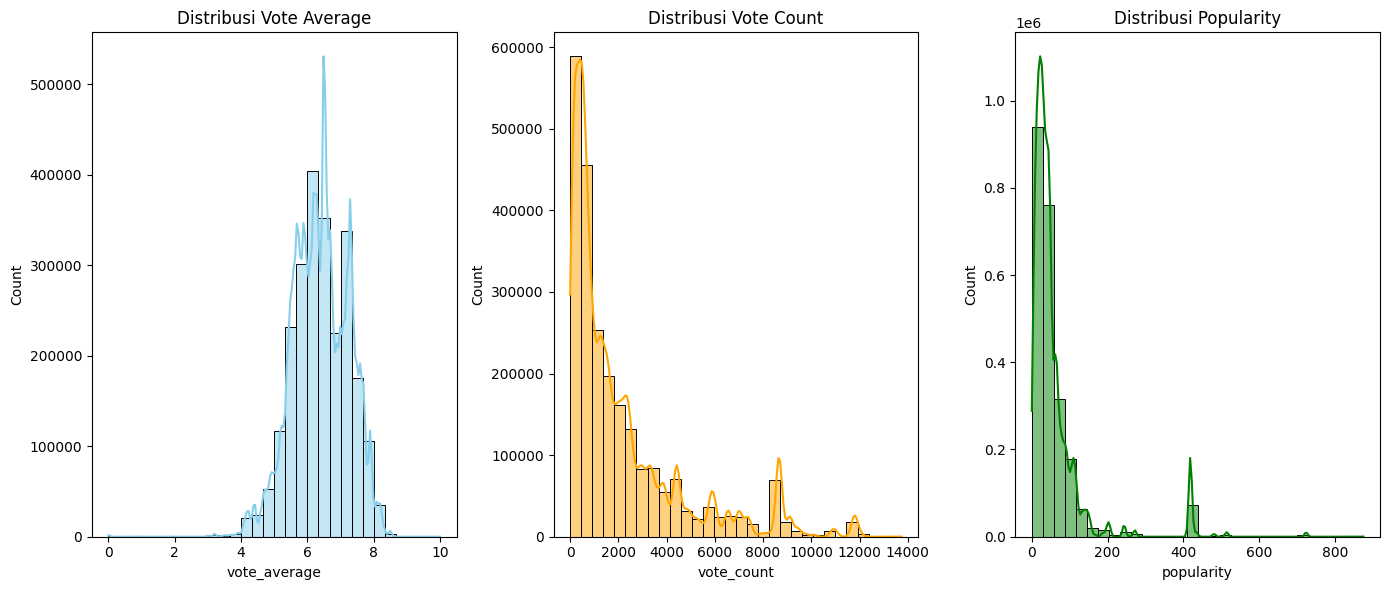

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(movies_final['vote_average'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Vote Average')

plt.subplot(1, 3, 2)
sns.histplot(movies_final['vote_count'], kde=True, bins=30, color='orange')
plt.title('Distribusi Vote Count')

plt.subplot(1, 3, 3)
sns.histplot(movies_final['popularity'], kde=True, bins=30, color='green')
plt.title('Distribusi Popularity')

plt.tight_layout()
plt.show()

di sini kita dapat melihat bahwa selain distribusi vote average memiliki distribusi miring sehing perlu dilakukan preprocessing nantinya.

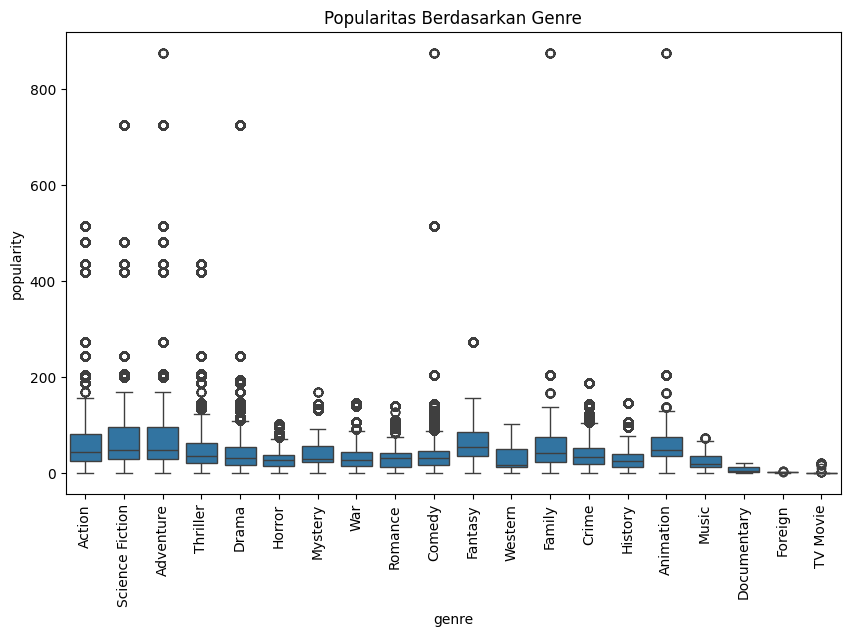

In [ ]:
# 4. Analisis Genre dan Popularitas
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='popularity', data=movies_final)
plt.xticks(rotation=90)
plt.title('Popularitas Berdasarkan Genre')
plt.show()

dari hasil analisis boxplot untuk genre dan popularity kita dapat melihat bahwa Fantasy memiliki jumlah popularity rata rata lebih tinggi dibandingkan lainnya. selain itu terdapoat banyak outliers di dalam data.

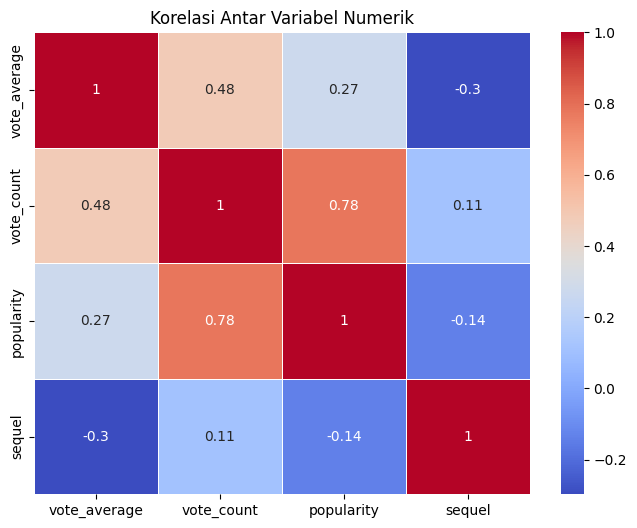

In [ ]:
# 5. Korelasi Antar Variabel Numerik
corr_matrix = movies_final[['vote_average', 'vote_count', 'popularity', 'sequel']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

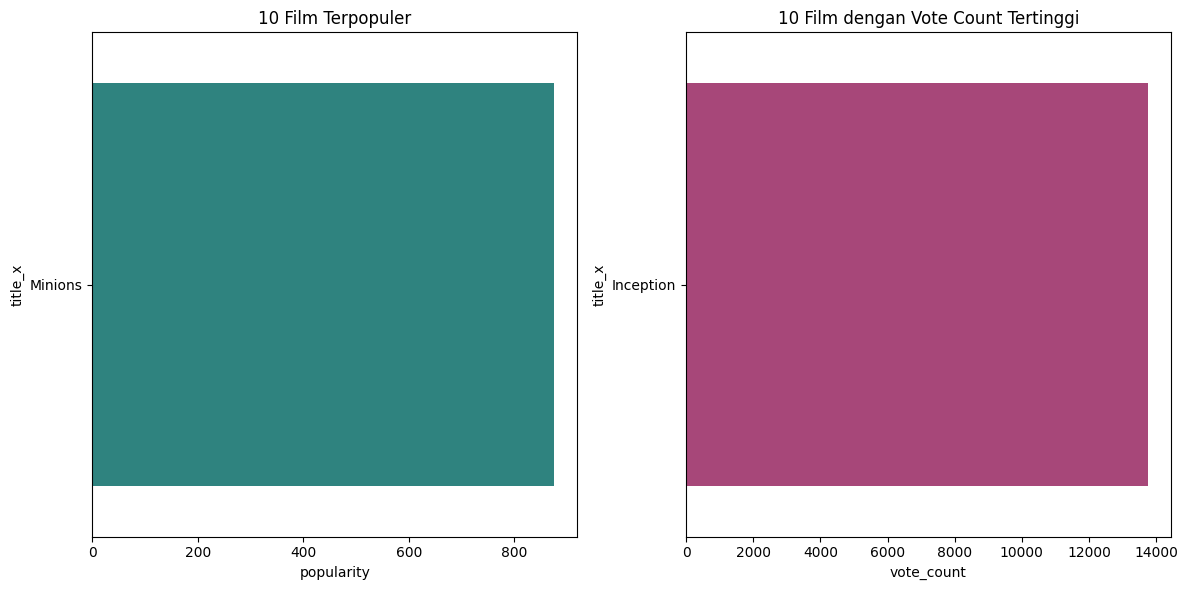

In [ ]:
# 7. Film Terpopuler dan Paling Banyak Mendapat Suara
top_popularity = movies_final[['title_x', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
top_vote_count = movies_final[['title_x', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='popularity', y='title_x', data=top_popularity, palette='viridis')
plt.title('10 Film Terpopuler')

plt.subplot(1, 2, 2)
sns.barplot(x='vote_count', y='title_x', data=top_vote_count, palette='magma')
plt.title('10 Film dengan Vote Count Tertinggi')

plt.tight_layout()
plt.show()

In [ ]:
top_popularity.head()

,title_x,popularity
1057157,Minions,875.581305
1057220,Minions,875.581305
1057230,Minions,875.581305
1057229,Minions,875.581305
1057228,Minions,875.581305


In [ ]:
movies_final_duplicated = movies_final

In [ ]:
movies_final_duplicated = movies_final_duplicated.drop_duplicates()

In [ ]:
# 7. Film Terpopuler dan Paling Banyak Mendapat Suara
top_popularity = movies_final_duplicated[['title_x', 'popularity']].sort_values(by='popularity', ascending=False)
top_vote_count = movies_final_duplicated[['title_x', 'vote_count']].sort_values(by='vote_count', ascending=False)


In [ ]:
top_popularity = top_popularity.drop_duplicates()
top_vote_count = top_vote_count.drop_duplicates()

top_popularity_10 = top_popularity.head(10)
top_vote_count_10 = top_vote_count.head(10)

In [ ]:
top_popularity_10

,title_x,popularity
1057157,Minions,875.581305
274640,Interstellar,724.247784
1332662,Deadpool,514.569956
271153,Guardians of the Galaxy,481.098624
356801,Mad Max: Fury Road,434.278564
173771,Jurassic World,418.708552
504905,Pirates of the Caribbean: The Curse of the Bla...,271.972889
251110,Dawn of the Planet of the Apes,243.791743
511572,The Hunger Games: Mockingjay - Part 1,206.227151
262492,Big Hero 6,203.734590


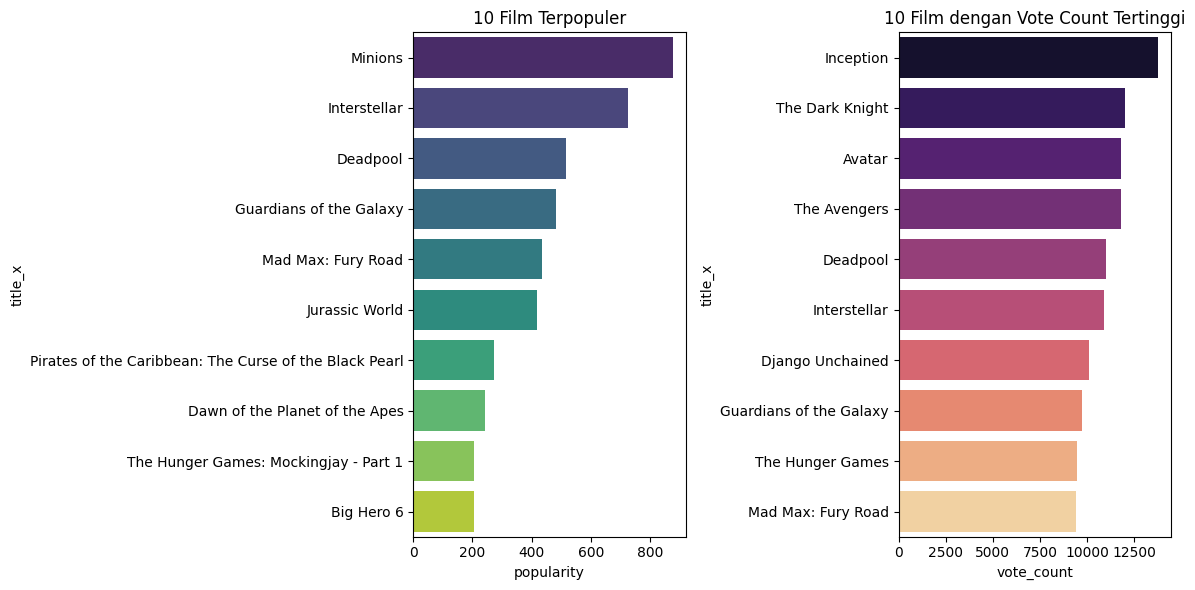

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='popularity', y='title_x', data=top_popularity_10, palette='viridis')
plt.title('10 Film Terpopuler')

plt.subplot(1, 2, 2)
sns.barplot(x='vote_count', y='title_x', data=top_vote_count_10, palette='magma')
plt.title('10 Film dengan Vote Count Tertinggi')

plt.tight_layout()
plt.show()

dengan menggunakna bar plot kita dapat melihat bahwa berdasarkan popularity minions memasuki peringkat pertama fil terpopuler. sedangan pada voting inception memasuki peringkat pertama

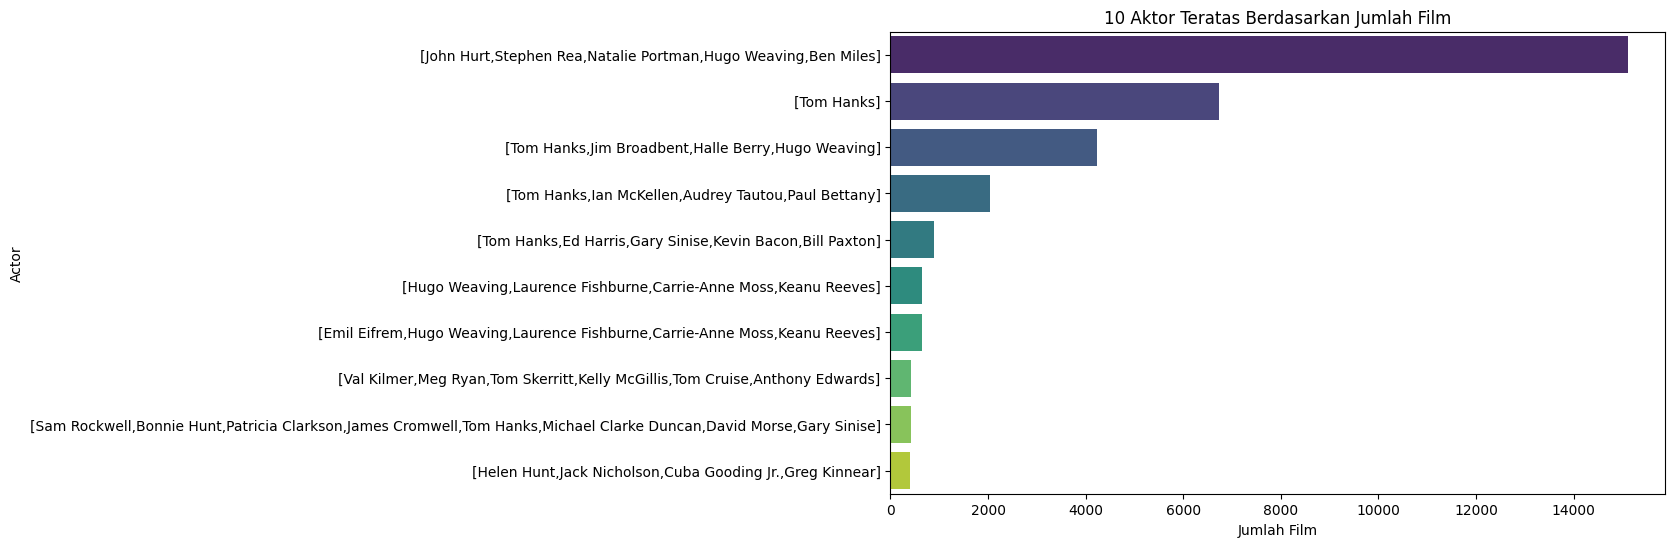

In [ ]:

# 7. Analisis Aktor Populer
top_actors = movies_final['Actor'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('10 Aktor Teratas Berdasarkan Jumlah Film')
plt.xlabel('Jumlah Film')
plt.show()

Aktor populer jika kita lihat secara perorangan adalah Tom Hanks

                 id  vote_average    vote_count    popularity         sequel
count  2.392589e+06  2.392589e+06  2.392023e+06  2.392589e+06  120749.000000
mean   4.863347e+04  6.386172e+00  2.120929e+03  5.957547e+01   32293.694457
std    7.870587e+04  8.364217e-01  2.439813e+03  8.242464e+01   50418.941142
min    5.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00      58.000000
25%    2.157000e+03  5.800000e+00  4.770000e+02  2.037431e+01     834.000000
50%    1.001200e+04  6.400000e+00  1.219000e+03  3.710435e+01    2789.000000
75%    5.318200e+04  7.000000e+00  2.768000e+03  6.445795e+01   62211.000000
max    4.594880e+05  1.000000e+01  1.375200e+04  8.755813e+02  271110.000000


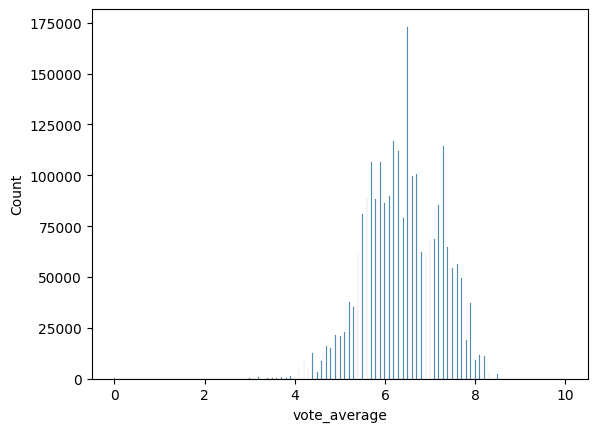

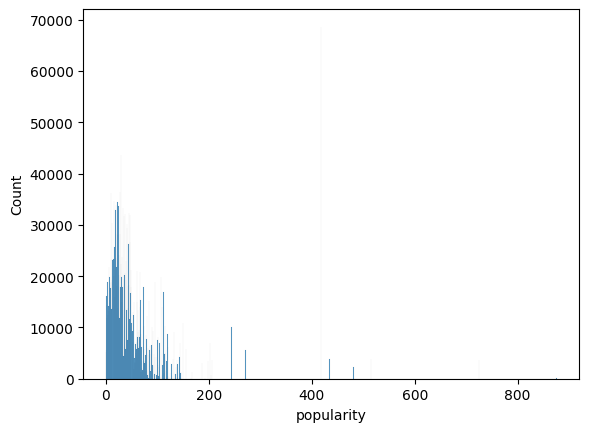

In [ ]:
# Statistik deskriptif
print(movies_final.describe())

# Distribusi vote_average
sns.histplot(movies_final['vote_average'])
plt.show()

# Distribusi popularity
sns.histplot(movies_final['popularity'])
plt.show()

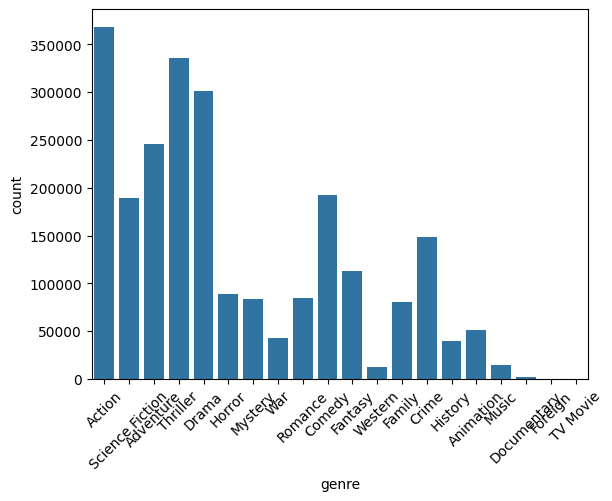

In [ ]:
# Distribusi genre
sns.countplot(x='genre', data=movies_final)
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies_final.columns

Index(['Actor', 'title_x', 'id', 'department_x', 'job_x', 'name_x',
       'vote_average', 'vote_count', 'popularity', 'release_date',
       'department_y', 'job_y', 'name_y', 'title_y', 'sequel', 'genre'],
      dtype='object')



---

